In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Veri oluşturma
X= 2* np.random.rand(100,1)

In [36]:
#Hata oluşturma
error= np.random.randn(100,1)#np.random.randn() ile üretilen sayılar, ortalama etrafında simetrik olarak dağılmış ve birim standart sapmaya sahip olur.

In [34]:
#Çıktının formülü
y= 4 + 3*X + error

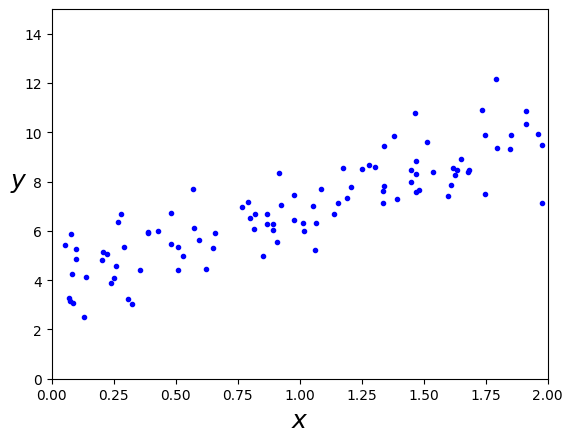

In [76]:
#Veriyi çizme

plt.plot(X,y,'b.') #"b." ifadesi, mavi (blue) renkteki noktaların kullanılmasını ve her noktanın bir "." ile temsil edilmesini belirtir
plt.xlabel("$x$", fontsize=18) #"$x$" ifadesi, etiketin metnini temsil eder ve bu durumda "x" olarak görüntülenir. 
plt.ylabel("$y$", rotation=0, fontsize=18) #rotation=0, etiketin yatay olarak hizalanmasını sağlar. 

"""
Bu satır, grafik üzerindeki eksenlerin aralığını ayarlar. [0, 2, 0, 15], x-ekseni için [0, 2] aralığını ve y-ekseni için [0, 15] aralığını belirtir. _ sembolü, bu işlemin bir dönüş değerine 
sahip olmadığını gösterir ve bu nedenle dönen değeri atlamamızı sağlar."""
_ =plt.axis([0,2,0,15])


## Analitik Çözüm
$$ y = WX $$
Burada bulmaya çalıştığımız $W$ vektörüdür.

Matrisler ile bu çözüm:

$$W = (X^TX)^{-1}X^Ty$$

In [37]:
#Aslında gradient descent ile yapacağız fakat burda matris çarpımıyla göreceğiz

#X'e bias column ekle, bias sabit sütundur. X_b matrisi, X matrisine sütun eklenmiş halidir.
X_b= np.c_[np.ones((100,1)),X]
#ones burada matris oluşturur, np.c_[] matris sütunlarını birleştirir.

In [38]:
# katsayı tahminlerini hesapla -> numpy ile çöz
#doğrusal regresyonun kapalı form (closed-form) çözümünü kullanarak bu katsayıları hesaplama

#linalg.inverse(ters) förmüldeki -1dir, tersi alır
#transpoz: sütunları satırlara ve satırları sütunlara dönüştüren işlem

w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(w_best)

[[3.97820635]
 [2.98618549]]


In [39]:
#yeni data
X_new= np.array([[0],[2]]) #iç içe geçmiş iki liste
X_new
#Buradaki ikili matrisin ilk elemanı 0, ikinci elemanı 2dir.

array([[0],
       [2]])

In [80]:
#bias sütunu ekleme
X_new_b= np.c_[np.ones((2,1)), X_new] #np.ones(2,1) 2 satır 1 sütunlu bir dizi anlamındadır
X_new_b

array([[1., 0.],
       [1., 2.]])

In [41]:
#tahmin yap
#optimum w değerleri = w_best

y_predict= X_new_b.dot(w_best)
y_predict

array([[3.97820635],
       [9.95057733]])

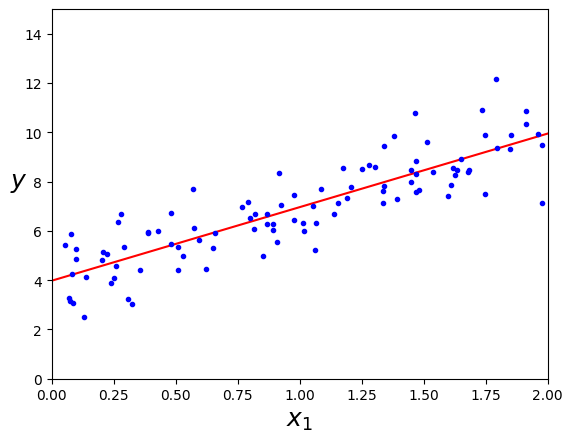

In [43]:
#grafiksel olarak bakacak olursak

#tahmim doğrusu
plt.plot(X_new, y_predict, "r-")#"r-": solid line - çizgi kırmızı renkte ve sürekli bir çizgidir.

#bütün data
plt.plot(X,y, "b.")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([0,2,0,15])
plt.show()

## Gradient Descent
Şimdi aynı işlemi Gradient Descent ile yapalım:

In [54]:
#Maliyet hesaplaması fonksiyonu

def cal_cost(W, X, y):
    n=len(y)
    tahmin= X.dot(W)
    
    cost= (1/2*n) * np.sum(np.square(tahmin-y))
    return cost

In [55]:
#Gradient Descent

def gradient_descent(X, y, W, learning_rate=0.01, iterations=100):
    
    n = len(y)
    cost_history = np.zeros(iterations)
    w_history = np.zeros((iterations, 2))
    
    for it in range(iterations):
        
        tahmin = np.dot(X, W)
        
        W = W - (1/n) * learning_rate * (X.T.dot((tahmin - y)))
        
        w_history[it,:] = W.T
        
        cost_history[it] = cal_cost(W, X, y)
    
    return W, cost_history, w_history

In [83]:
# learning rate
lr = 0.01

# iterasyon sayısı
n_iter = 1000

# başlangıç için W vektörü
W = np.random.randn(2,1)

# X vektörüne bias column ekle
X_b = np.c_[np.ones((len(X),1)),X]

# gradient descent çalıştır
W, cost_history, w_history = gradient_descent(X_b, y, W, lr, n_iter)


print('W0: {:0.3f}'.format(W[0][0]))#{:0.3f} ifadesi, bir ondalık sayının formatını belirtir. Bu format, toplamda 3 basamaklı bir ondalık sayıyı (virgülden sonra 3 basamak) ve 0 ile doldurulmuş olması gerektiğini belirtir.
print('W1: {:0.3f}'.format(W[1][0]))
print('Final cost/MSE: {:0.3f}'.format(cost_history[-1])) #-1 = son elemanı yazdır

W0: 3.955
W1: 3.006
Final cost/MSE: 5038.306


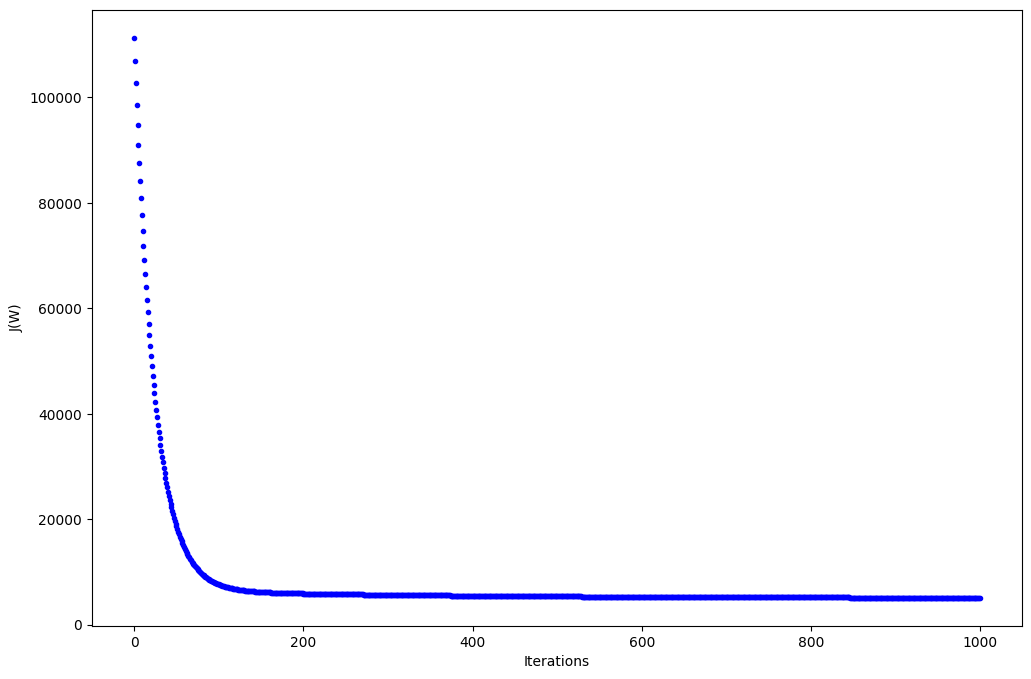

In [62]:
#iterasyon çizimleri

fig,ax=plt.subplots(figsize=(12,8))

ax.set_ylabel("J(W)")
ax.set_xlabel("Iterations")

_=ax.plot(range(n_iter), cost_history, "b.") #"b."= mavi ve noktalı

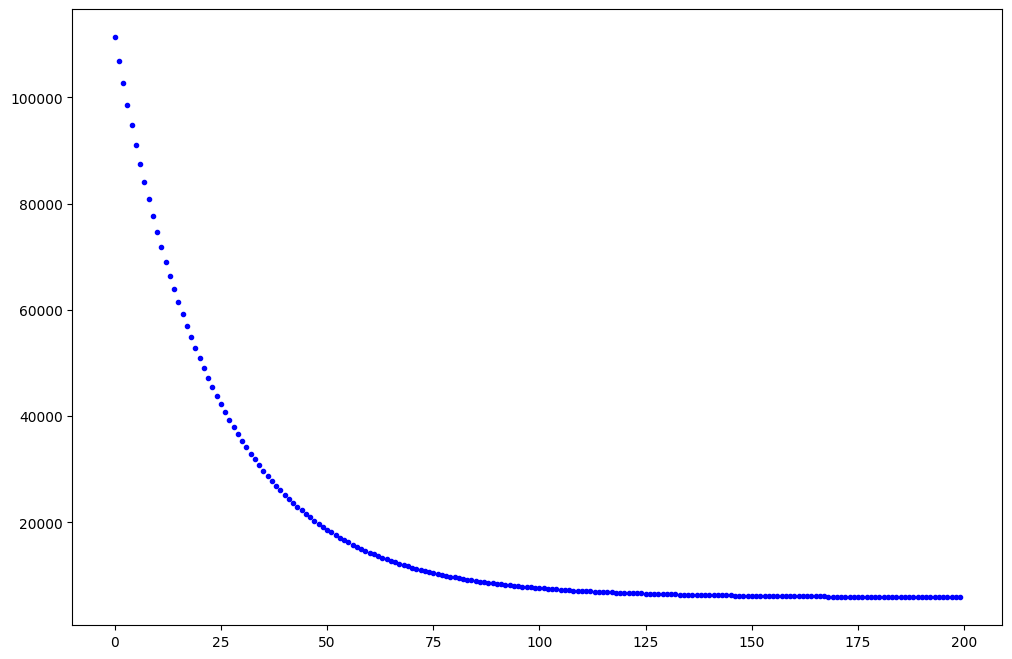

In [64]:
#Daha dar bir aralıkta, 200 iterasyon için çizelim

fig,ax=plt.subplots(figsize=(12,8))

_=ax.plot(range(200), cost_history[:200],"b.")

**Gradient Descent'in nasıl çalıştığını fonksiyon ile görelim:**

In [88]:
# Gradient Descent'i çizen fonksiyon
#ax = Gradient Descent çizmek için axis,ax1 = cost_history vs Iterations grafiği için axis


def plot_GD(n_iter, lr, ax, ax1=None):
     """
     n_iter = iterasyon sayısı
     lr = Learning Rate
     ax = Gradient Descent çizmek için axis
     ax1 = cost_history vs Iterations grafiği için axis
     """
     _ = ax.plot(X, y, 'b.')
     W = np.random.randn(2,1)

     tr = 0.1
     cost_history = np.zeros(n_iter)
        
     for i in range(n_iter):
        pred_prev = X_b.dot(W)
        
        W, h, _ = gradient_descent(X_b, y, W, lr, 1)
        
        pred = X_b.dot(W)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X, pred,'r-', alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
                
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.') 
    

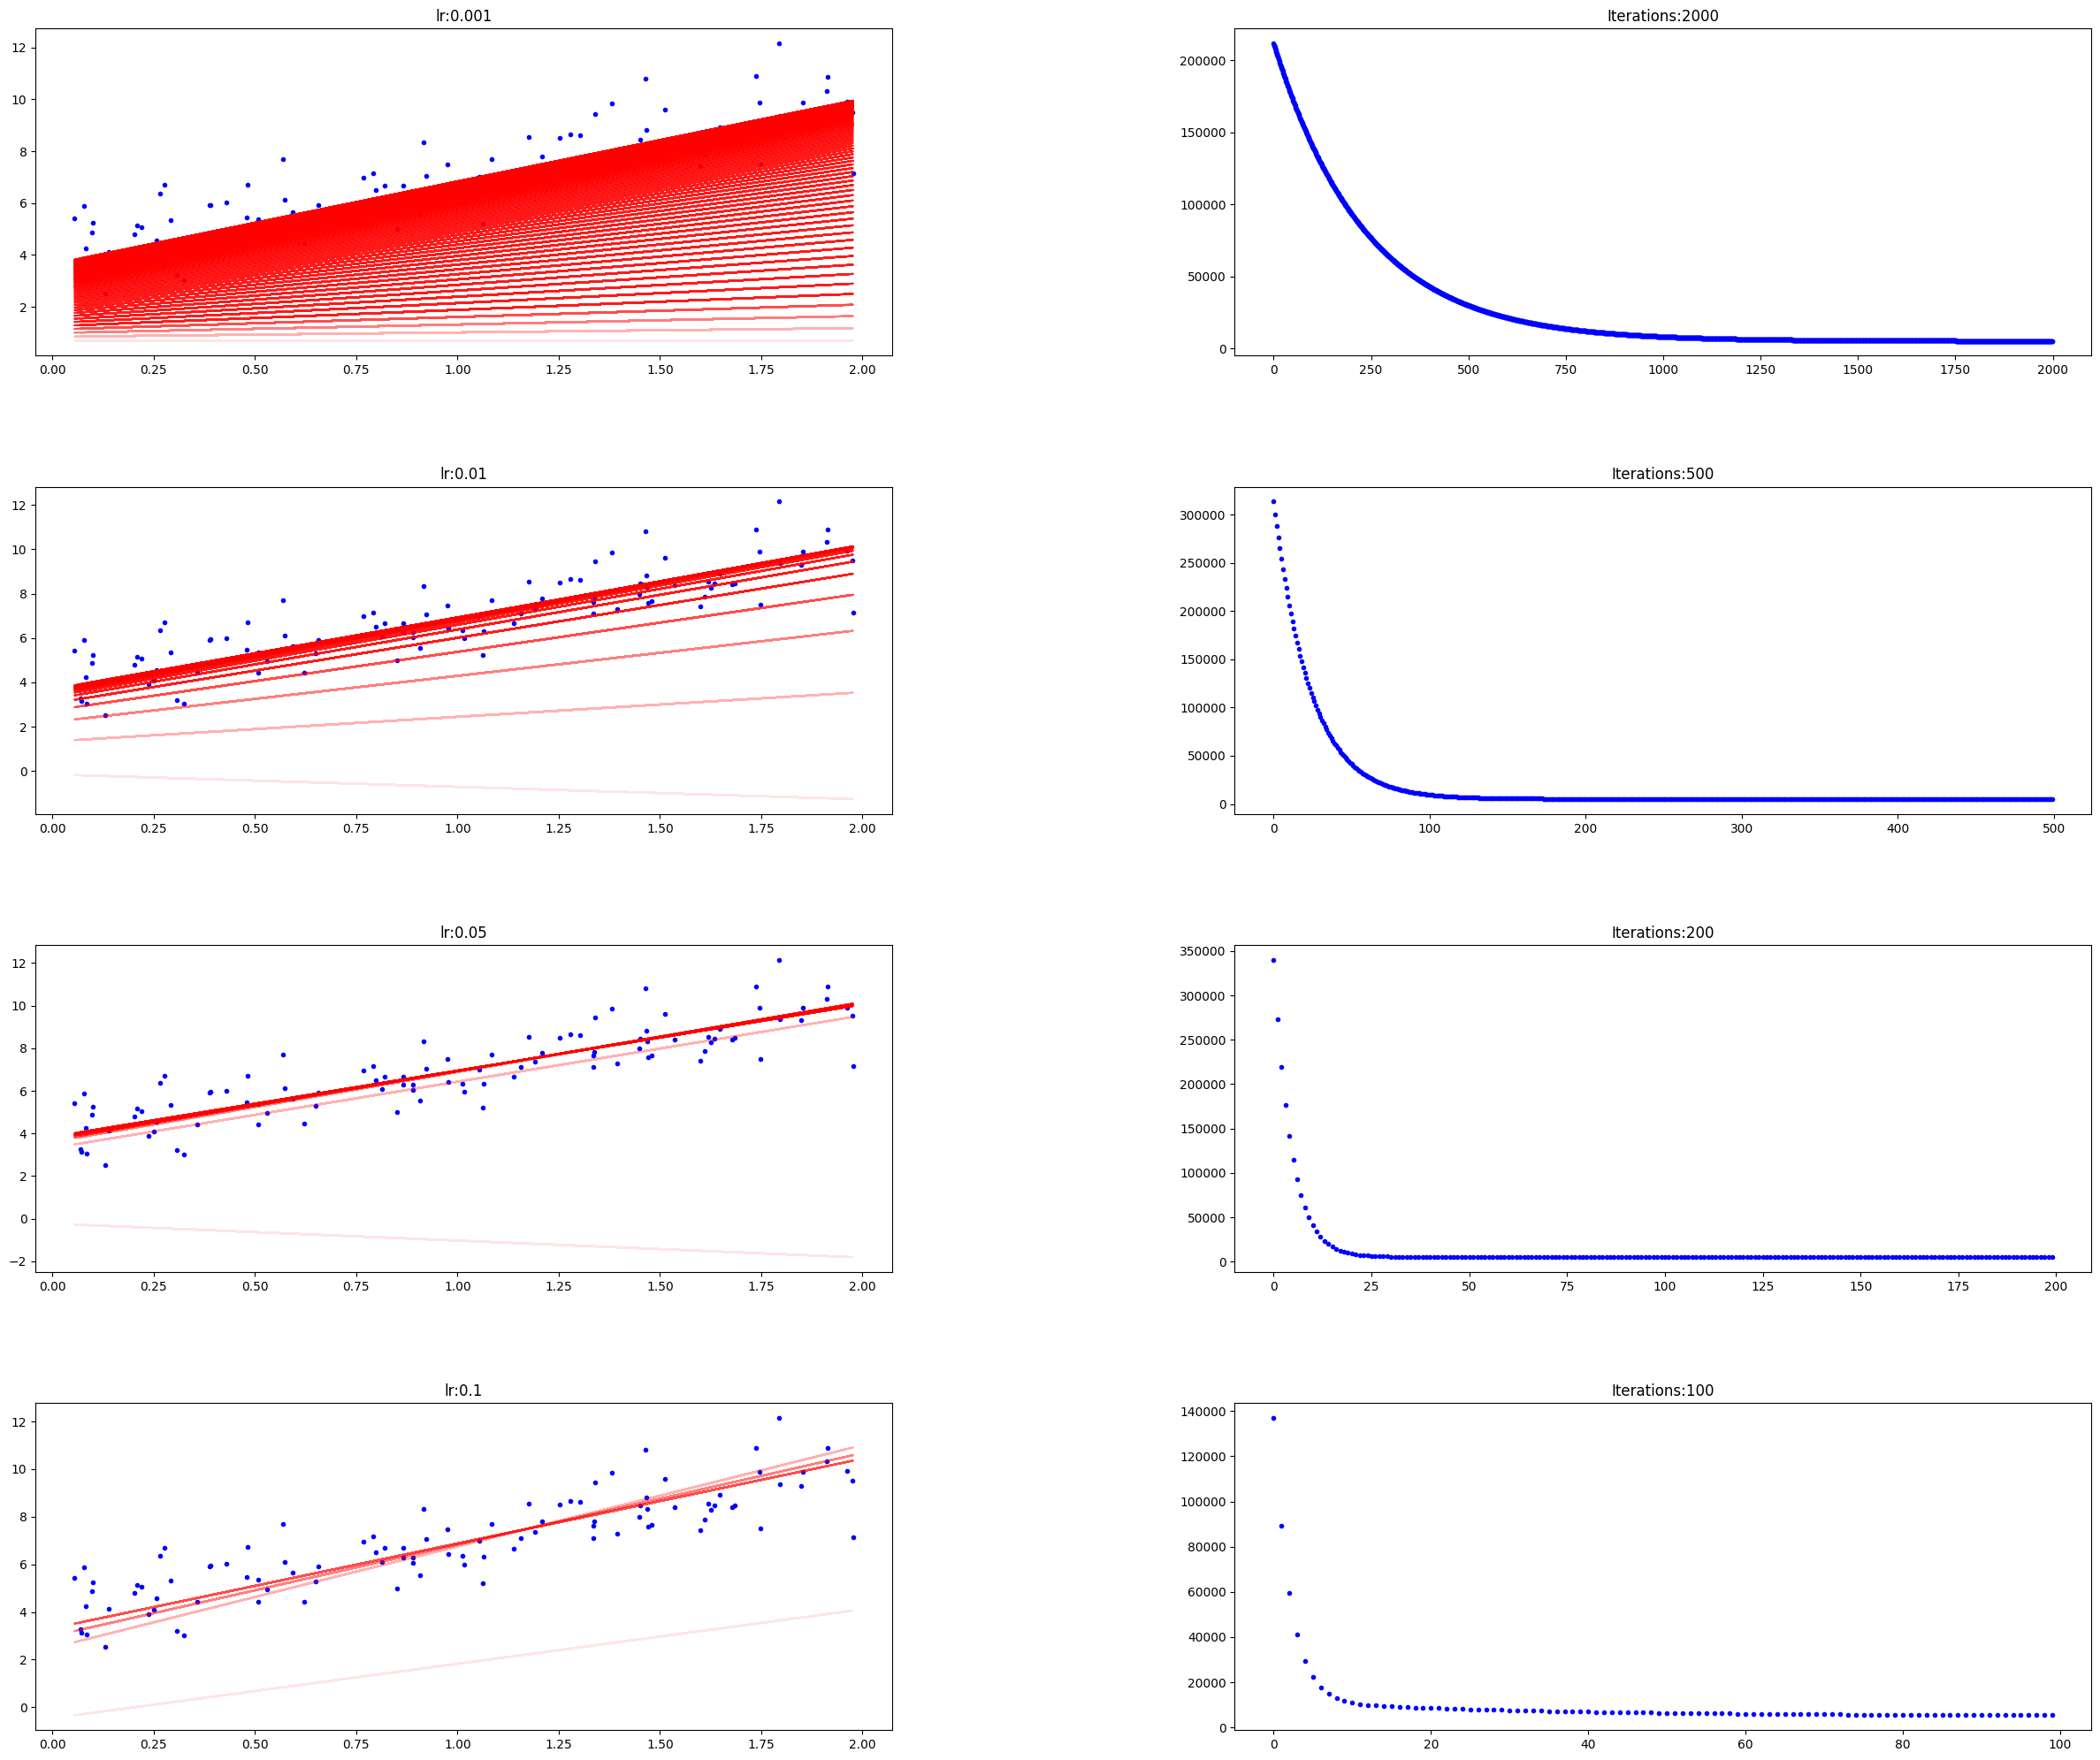

In [90]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)#adjust=ayarlamak, hspace=yatay, wspace=dikey

# iterasyon ve learning rate listesi
it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)] #sırasıyla iterasyon ve lr sayısı

count =0

for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count) #4 satır iki sütun, iterasyon için 
    count += 1
   
    ax1 = fig.add_subplot(4, 2, count) #lr için
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    
    plot_GD(n_iter, lr, ax, ax1)

#burada lr artarken iterasyon küçültülmüş ve bunlar aarsındaki farkı görüyoruz

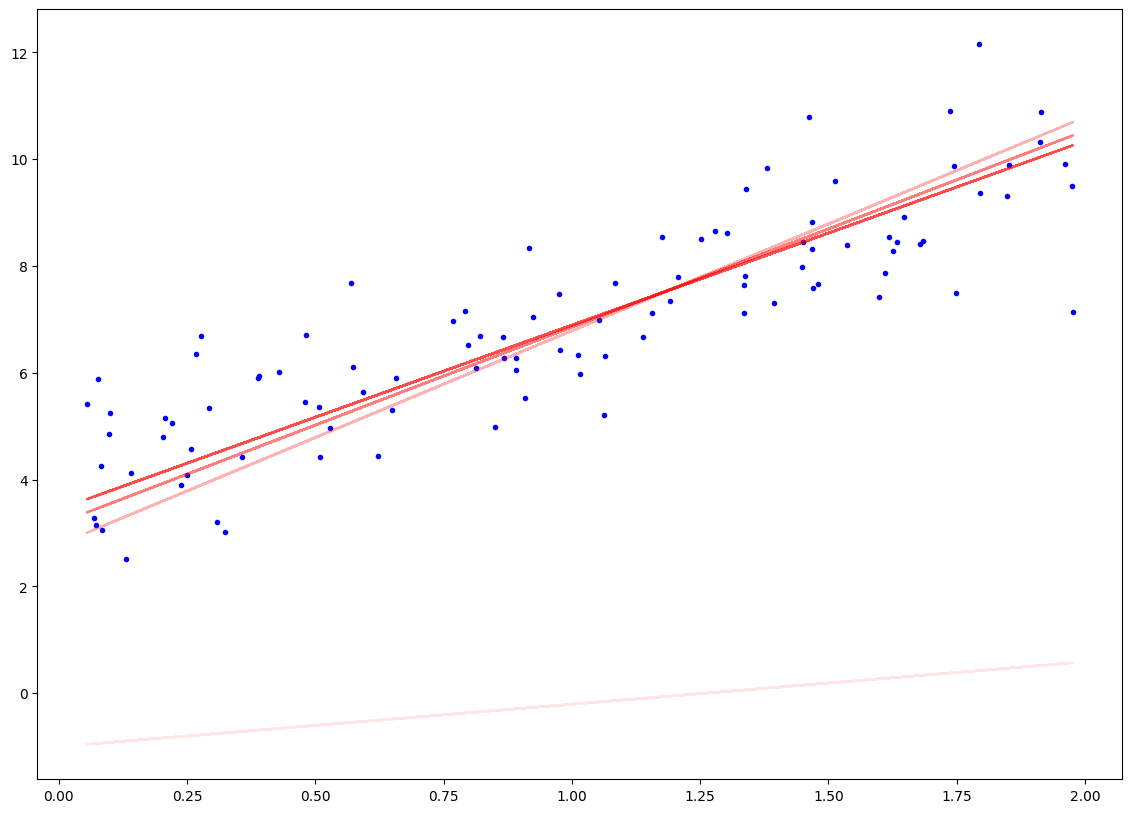

In [96]:
#Bir tanesine detaylı bakalım:

_,ax = plt.subplots(figsize=(14,10))

plot_GD(100, 0.1, ax)

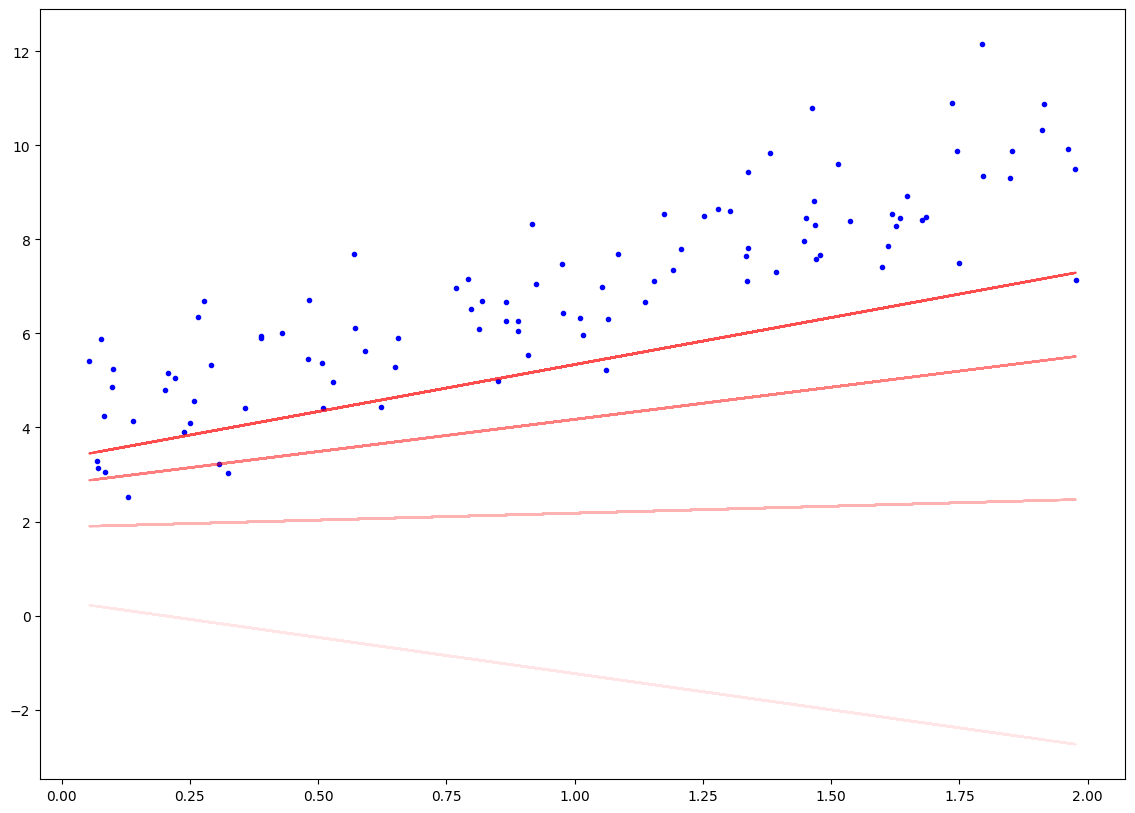

In [68]:
_,ax = plt.subplots(figsize=(14,10))

plot_GD(100, 0.01, ax)

### Stochastic Gradient Descent

In [69]:
# Stochastic Gradient Descent Fonksiyonu

def stochastic_gradient_descent(X, y, W, learning_rate=0.01, iterations=100):
    """
    Stochastic Gradient Descent uygulama fonksiyonu.
    Parametreler:
    X = X Matrisi (bias unit eklenmiş hali, yani 1'lerden oluşmuş ilk sütun)
    y = y vektörü
    W = Katsayı vektörü (w'lardan oluşmuş)
    learning_rate = learning rate: alpha (öğrenme katsayısı)
    iterations = toplam döngü sayısı
    Dönüş:
    * W vektörünün son hali
    * Maliyet Listesi (cost history)
    * W vektörünün listesi (weight history)
    """
    
    n = len(y)    
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):        
        cost = 0        
        # her seferinde rasgele bir X_i değeri seçip maliyet hesaplayacağız
        for i in range(n):            
            # rasgele bir değer al
            rand_ind = np.random.randint(0, n)    
            
            X_i = X[rand_ind,:].reshape(1, X.shape[1])            
            y_i = y[rand_ind].reshape(1,1)
        
            # tek X_i için tahmin
            tahmin = np.dot(X_i, W)

            # tek X_i için katsayı değişimi
            W = W - (1/n) * learning_rate * (X_i.T.dot((tahmin - y_i)))
            
            # tek X_i için hesaplanan cost'u cost değişkenine ekle
            cost += cal_cost(W, X_i, y_i)
        
        # bu iterasyon için cost değerini cost_history'ye ekle
        cost_history[it] = cost
    
    return W, cost_history

In [70]:
# learning rate
lr = 0.5

# iterasyon sayısı
n_iter = 50

# başlangıç için W vektörü
W = np.random.randn(2,1)

# X vektörüne bias column ekle
X_b = np.c_[np.ones((len(X),1)),X]

# gradient descent çalıştır
W, cost_history = stochastic_gradient_descent(X_b, y, W, lr, n_iter)


print('W0: {:0.3f}'.format(W[0][0]))
print('W1: {:0.3f}'.format(W[1][0]))
print('Final cost/MSE: {:0.3f}'.format(cost_history[-1]))

W0: 3.970
W1: 2.989
Final cost/MSE: 42.299


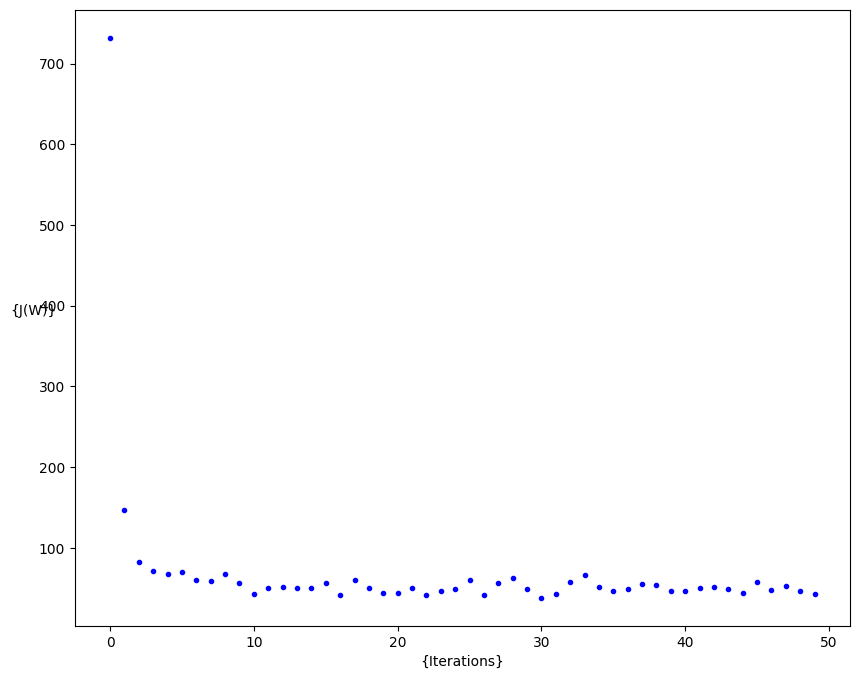

In [71]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(W)}',rotation=0)
ax.set_xlabel('{Iterations}')

_=ax.plot(range(n_iter), cost_history, 'b.')

Gördüğünüz gibi normal Gradient Descent gibi lineer azalmadı.

Bazen arttı bazen azaldı. Çünkü rasgele seçtik noktaları.

Ama nihayetinde o da azalarak giden bir eğim izledi.

### Mini-Batch Gradient Descent

In [72]:
# Mini-Batch Stochastic Gradient Descent Fonksiyonu

def minibatch_stochastic_gradient_descent(X, y, W, learning_rate=0.01, iterations=100, batch_size=20):
    """
    Stochastic Gradient Descent uygulama fonksiyonu.
    Parametreler:
    X = X Matrisi (bias unit eklenmiş hali, yani 1'lerden oluşmuş ilk sütun)
    y = y vektörü
    W = Katsayı vektörü (w'lardan oluşmuş)
    learning_rate = learning rate: alpha (öğrenme katsayısı)
    iterations = toplam döngü sayısı
    Dönüş:
    * W vektörünün son hali
    * Maliyet Listesi (cost history)
    * W vektörünün listesi (weight history)
    """
    
    n = len(y)
    cost_history = np.zeros(iterations)
    # toplam kaç adet batch olacak
    n_batches = int(n / batch_size)
    
    for it in range(iterations):
        cost = 0
        # X ve y'leri karıştır (veri sıraları rasgele olsun)
        indices = np.random.permutation(n)
        X = X[indices]
        y = y[indices]
        
        # her seferinde rasgele bir X_i partisi alıp maliyet hesaplayacağız
        for i in range(0, n, batch_size):
            # rasgele X_i ve y_i partileri
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
        
            # bias column ekle (1'ler sütunu)
            x_i = np.c_[np.ones(len(X_i)), X_i]
        
            # X_i partisi için tahmin
            tahmin = np.dot(X_i, W)

            # X_i partisi için katsayı değişimi
            W = W - (1/n) * learning_rate * (X_i.T.dot((tahmin - y_i)))

            # X_i partisi için hesaplanan cost'u cost değişkenine ekle
            cost += cal_cost(W, X_i, y_i)
        
        # bu iterasyon için cost değerini cost_history'ye ekle
        cost_history[it] = cost
    
    return W, cost_history

In [73]:
# learning rate
lr = 0.1

# iterasyon sayısı
n_iter = 200

# başlangıç için W vektörü
W = np.random.randn(2,1)

# X vektörüne bias column ekle
X_b = np.c_[np.ones((len(X),1)),X]

# gradient descent çalıştır
W, cost_history = minibatch_stochastic_gradient_descent(X_b, y, W, lr, n_iter)


print('W0: {:0.3f}'.format(W[0][0]))
print('W1: {:0.3f}'.format(W[1][0]))
print('Final cost/MSE: {:0.3f}'.format(cost_history[-1]))

W0: 3.922
W1: 3.034
Final cost/MSE: 1005.633


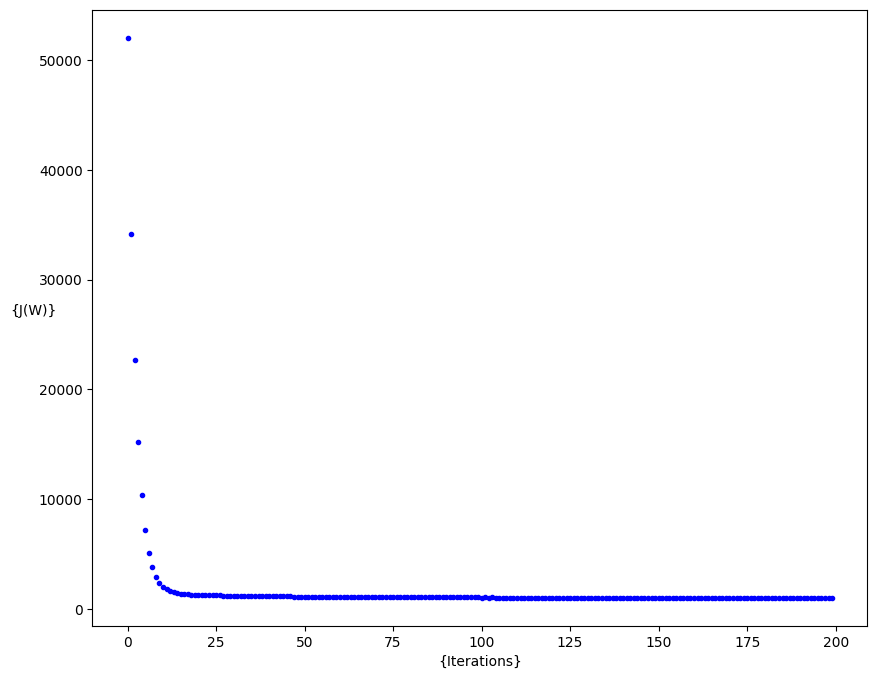

In [74]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(W)}',rotation=0)
ax.set_xlabel('{Iterations}')

_=ax.plot(range(n_iter), cost_history, 'b.')